In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix 

from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
import keras.backend as K

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.densenet import DenseNet169

In [3]:
def scale_and_PCA(data):

    scalar = StandardScaler()

    # fitting
    scalar.fit(data)
    scaled_data = scalar.transform(data)


    # Let's say, components = 2
    pca = PCA(n_components = 2)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)

    mnist_train_data = train.loc[:, "pixel0":]
    mnist_train_label = train.loc[:, "label"]

    df_PCA = pd.DataFrame(x_pca, columns=["f1", "f2"])

    df_PCA["label"] = train["label"]

    plt.figure(figsize=(18,15))
    sns.scatterplot(data = df_PCA, x="f1", y="f2", hue="label")

In [4]:
def train_classifier(classifier):
    clfier = classifier()
    clfier.fit(X_train, y_train)

    # make predictions
    y_pred_clfier = clfier.predict(X_test)
    # evaluate predictions
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_clfier))
    print('Jaccard Score: %.3f' % jaccard_score(y_test, y_pred_clfier, average = "micro"))
    
     
    cm_clfier = confusion_matrix(y_test, y_pred_clfier)
    sns.heatmap(cm_clfier, annot=True, fmt="d", linewidths=.5, cmap="flare")

In [5]:
def model_eval(model_to_eval, name): 
    preds = model_to_eval.predict(X_test)
    preds = np.argmax(preds, axis=1)
    
    acc = metrics.accuracy_score(y_test, preds)
    pre = metrics.precision_score(y_test, preds, average='weighted')
    rec = metrics.recall_score(y_test, preds, average='weighted')
    f1 = metrics.f1_score(y_test, preds, average = 'weighted')
    jac = jaccard_score(y_test, preds, average="weighted")
    ham = metrics.hamming_loss(y_test, preds)
    
    df.loc[len(df.index)] = [name, acc, pre, rec, f1, jac, ham]

    print('accuracy     :', acc)
    print('precision    :', pre)
    print('recall       :', rec)
    print('f1 score     :', f1)
    print('jaccard score:', jac)
    print('hamming loss :', ham)
    
    pred_list.append(preds)

def model_train(model_name, name):
    model = Sequential()
    model.add(model_name(include_top=False, pooling='avg'))
    model.add(Dense(10, activation='softmax'))
    model.layers[0].trainable = False
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_split =0.3, verbose=1, epochs=10)
    models.append(model)
    
    model_eval(model, name)

In [6]:
pred_list = list()
models = list()
df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Jaccard Score', 'Hamming Loss'])
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [7]:
#loading the dataset.......(Train)
train = pd.read_csv("../input/digit-recognizer/train.csv")

#loading the dataset.......(Test)
test= pd.read_csv("../input/digit-recognizer/test.csv")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

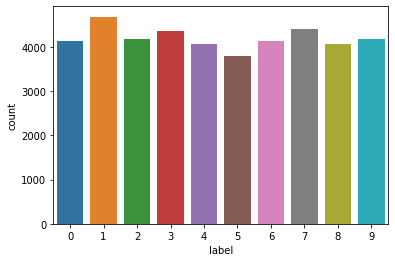

In [8]:
sns.countplot(train['label'])

In [9]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')

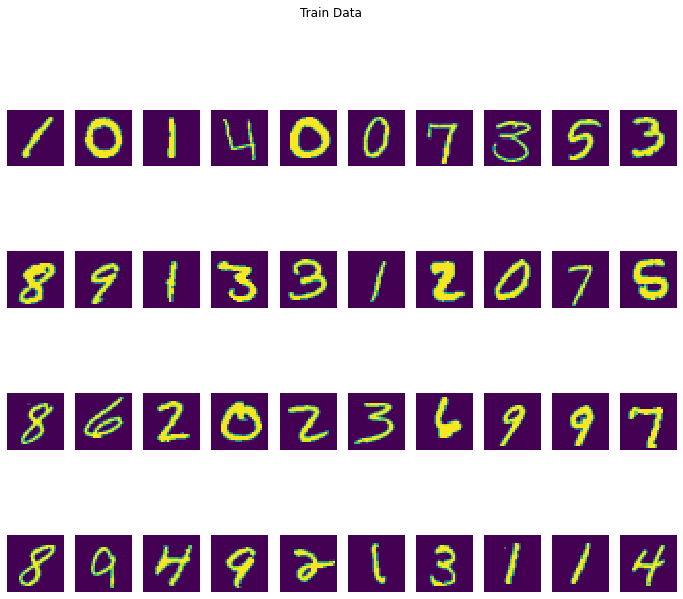

In [10]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
    plt.axis('off')
    plt.suptitle("Train Data")
plt.show()

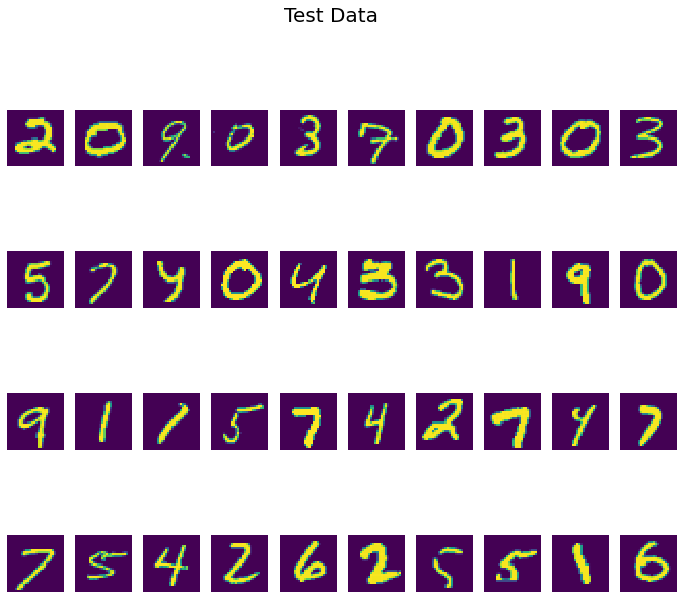

In [11]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_test[i].reshape((28,28)),interpolation='nearest')
    plt.axis('off')
    plt.suptitle("Test Data", fontsize = 20)
    
plt.show()

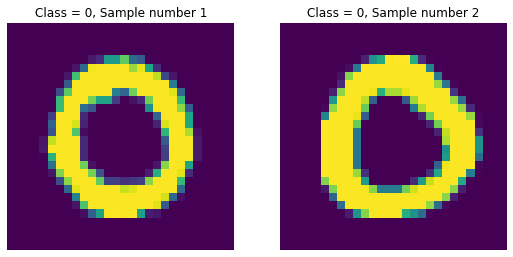

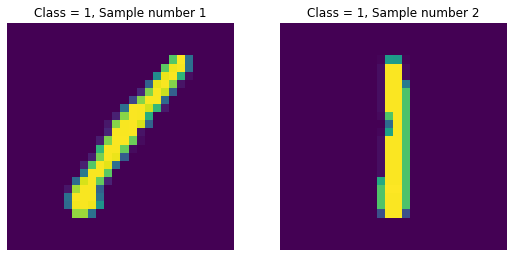

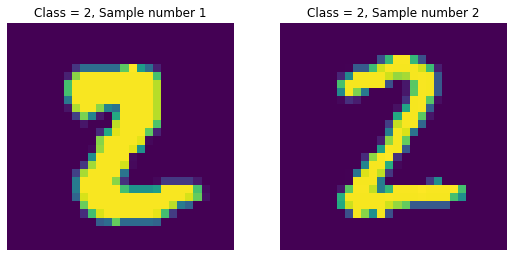

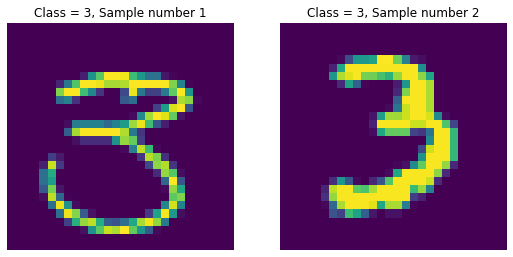

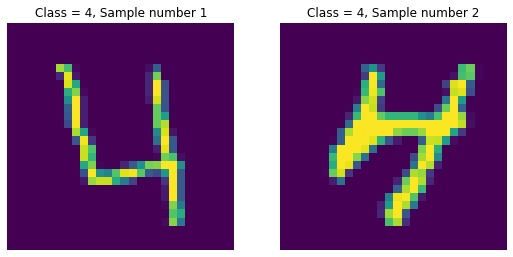

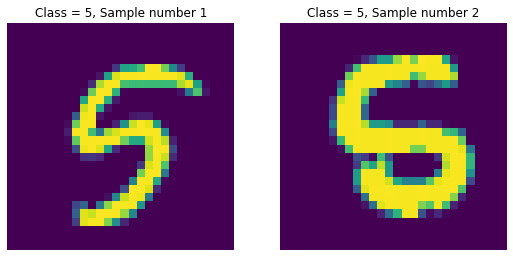

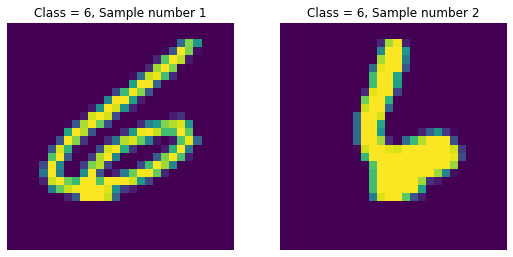

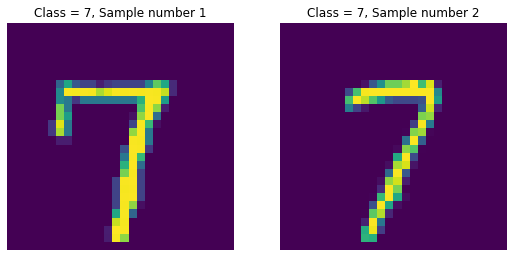

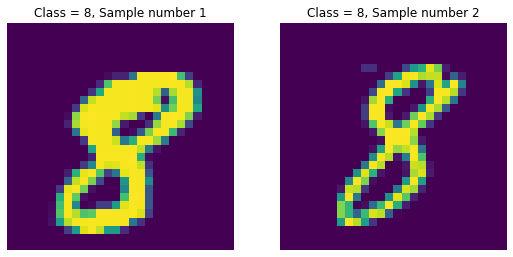

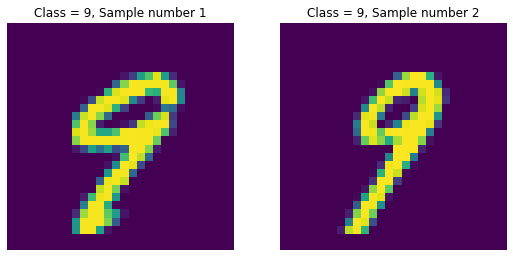

In [12]:
x_train_num = dict()
for i in range (10):
    x_num = train[train.label == i]
    x_train_num[i] = (x_num.iloc[:,1:].values).astype('float32') # all pixel values

# x, y = 10, 2

for j in range (10):
    plt.figure(figsize=(48,40))
    for i in range(2):  
        plt.subplot(y, x, i+1)
        plt.imshow(x_train_num[j][i].reshape((28,28)),interpolation='nearest')
        plt.axis('off')
        plt.title("Class = {}, Sample number {}".format(j, i+1))
    plt.show()

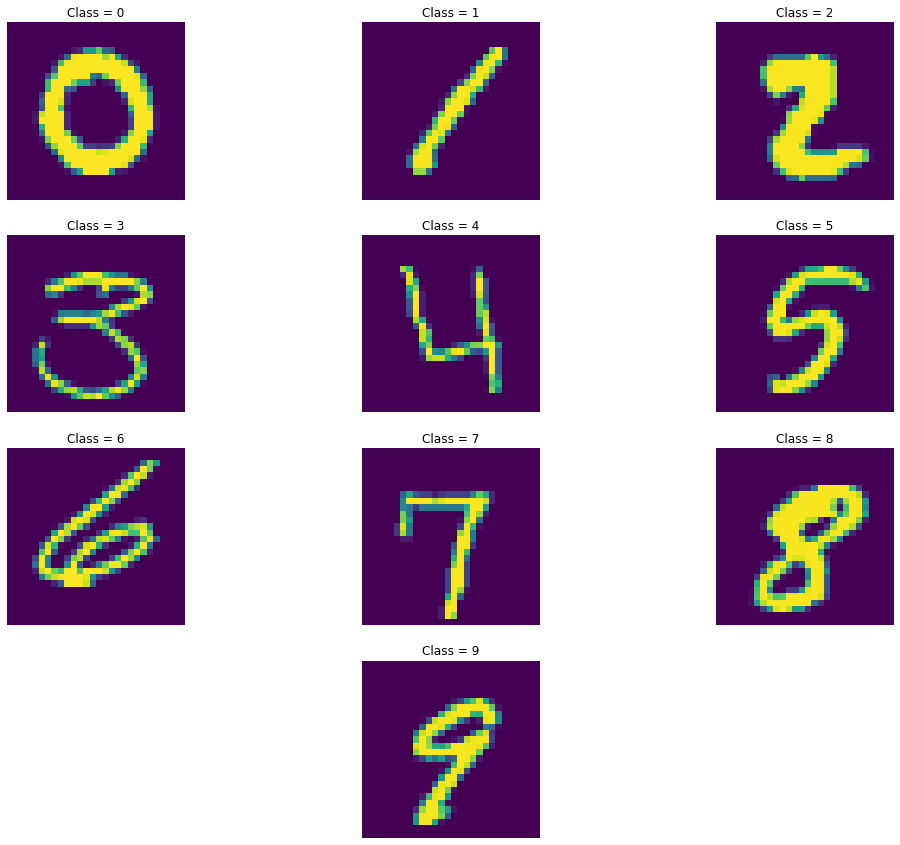

In [13]:
keypad = dict()
for i in range(10):
    keypad[i] = x_train_num[i][0]

x, y = 3, 4
plt.figure(figsize=(18,15))
for i in range(9):  
    plt.subplot(y, x, i+1)
    plt.imshow(keypad[i].reshape((28,28)),interpolation='nearest')
    plt.axis('off')
    plt.title("Class = {}".format(i))
plt.subplot(y, x, 11)
plt.imshow(keypad[9].reshape((28,28)),interpolation='nearest')
plt.title("Class = 9")
plt.axis('off')
plt.show()

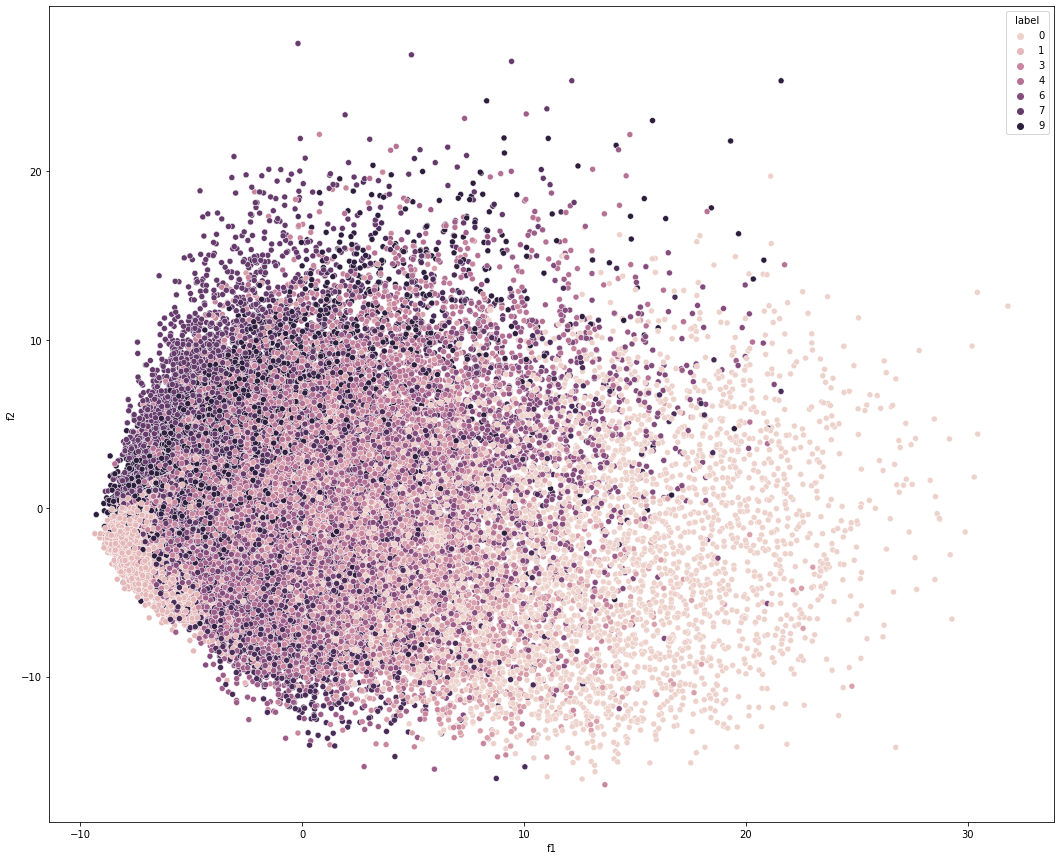

In [14]:
scale_and_PCA(x_train)

# Data Analysis

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.5)

## 1. RandomForestClassifier

Accuracy: 0.958
Jaccard Score: 0.919


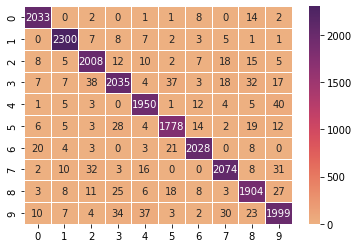

In [16]:
train_classifier(RandomForestClassifier)

## 2. XGBoost Classifier

Accuracy: 0.968
Jaccard Score: 0.938


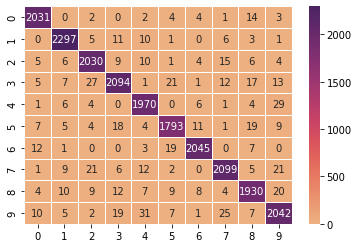

In [17]:
train_classifier(xgb.XGBClassifier)

## 3. Gradient Boost Classifier

Accuracy: 0.937
Jaccard Score: 0.882


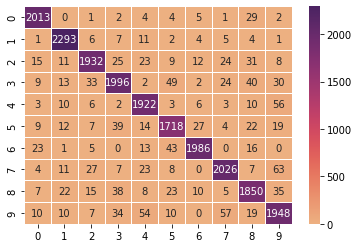

In [18]:
train_classifier(GradientBoostingClassifier)

## 4. Support Vector Classification

Accuracy: 0.970
Jaccard Score: 0.942


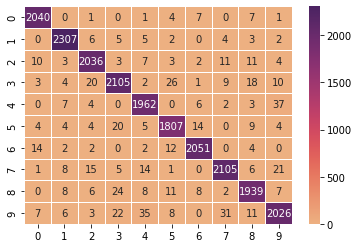

In [19]:
train_classifier(SVC)

## 5. K-Nearest Neighbour

Accuracy: 0.960
Jaccard Score: 0.924


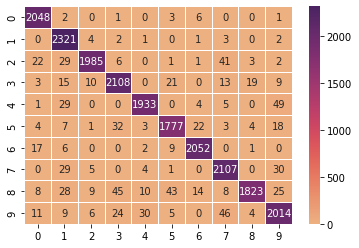

In [20]:
train_classifier(KNeighborsClassifier)

## 6. Naive Bayes

Accuracy: 0.571
Jaccard Score: 0.399


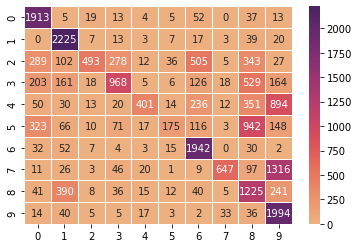

In [21]:
train_classifier(GaussianNB)

# MLP

Accuracy: 0.935
Jaccard Score: 0.877


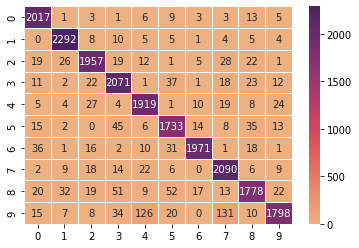

In [22]:
train_classifier(MLPClassifier)

# Neural Network

In [23]:
model1 = Sequential()
model1.add(Dense(10, activation = "softmax"))

model1.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model1.fit(X_train, y_train, validation_split = 0.2, verbose=1, epochs=10)

model_eval(model1, 'basic_model')

2022-06-26 05:41:38.062729: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-26 05:41:38.289533: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
525/525 [==============================] - 2s 2ms/step - loss: 14.4363 - accuracy: 0.7873 - val_loss: 8.7178 - val_accuracy: 0.8460
Epoch 2/10
525/525 [==============================] - 1s 2ms/step - loss: 7.4612 - accuracy: 0.8606 - val_loss: 6.7533 - val_accuracy: 0.8614
Epoch 3/10
525/525 [==============================] - 1s 1ms/step - loss: 6.3481 - accuracy: 0.8739 - val_loss: 7.8223 - val_accuracy: 0.8400
Epoch 4/10
525/525 [==============================] - 1s 2ms/step - loss: 5.7085 - accuracy: 0.8814 - val_loss: 6.5304 - val_accuracy: 0.8760
Epoch 5/10
525/525 [==============================] - 1s 2ms/step - loss: 5.5259 - accuracy: 0.8833 - val_loss: 6.6018 - val_accuracy: 0.8643
Epoch 6/10
525/525 [==============================] - 1s 2ms/step - loss: 5.2365 - accuracy: 0.8851 - val_loss: 6.1832 - val_accuracy: 0.8798
Epoch 7/10
525/525 [==============================] - 1s 2ms/step - loss: 5.0108 - accuracy: 0.8884 - val_loss: 5.8852 - val_accuracy: 0.8810
Epoch

# Pre Processing

In [24]:
import cv2

IMG_SIZE = 64

def resize(img_array):
    tmp = np.empty((img_array.shape[0], IMG_SIZE, IMG_SIZE))

    for i in range(len(img_array)):
        img = img_array[i].reshape(28, 28).astype('uint8')
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img.astype('float32')/255
        tmp[i] = img
        
    return tmp

X_train = resize(X_train)
X_test = resize(X_test)

X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)

# Models

In [25]:
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = "softmax"))

In [26]:
model2.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(X_train, y_train, verbose=1, epochs=10)

model_eval(model2, 'custom model')

Epoch 1/10
657/657 [==============================] - 204s 309ms/step - loss: 0.2693 - accuracy: 0.9179
Epoch 2/10
657/657 [==============================] - 203s 309ms/step - loss: 0.1063 - accuracy: 0.9699
Epoch 3/10
657/657 [==============================] - 202s 308ms/step - loss: 0.0823 - accuracy: 0.9756
Epoch 4/10
657/657 [==============================] - 203s 309ms/step - loss: 0.0725 - accuracy: 0.9794
Epoch 5/10
657/657 [==============================] - 205s 312ms/step - loss: 0.0664 - accuracy: 0.9825
Epoch 6/10
657/657 [==============================] - 206s 313ms/step - loss: 0.0650 - accuracy: 0.9827
Epoch 7/10
657/657 [==============================] - 206s 313ms/step - loss: 0.0633 - accuracy: 0.9833
Epoch 8/10
657/657 [==============================] - 206s 314ms/step - loss: 0.0690 - accuracy: 0.9810
Epoch 9/10
657/657 [==============================] - 207s 315ms/step - loss: 0.0675 - accuracy: 0.9831
Epoch 10/10
657/657 [==============================] - 209s 318m

## Transfer Learning Model

### ResNet50

In [27]:
model_train(ResNet50, 'ResNet50')

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/10
460/460 [==============================] - 156s 333ms/step - loss: 1.5185 - accuracy: 0.6162 - val_loss: 1.0908 - val_accuracy: 0.7646
Epoch 2/10
460/460 [==============================] - 153s 331ms/step - loss: 0.9316 - accuracy: 0.7826 - val_loss: 0.7854 - val_accuracy: 0.8240
Epoch 3/10
460/460 [==============================] - 154s 335ms/step - loss: 0.7273 - accuracy: 0.8252 - val_loss: 0.6490 - val_accuracy: 0.8484
Epoch 4/10
460/460 [==============================] - 153s 331ms/step - loss: 0.6170 - accuracy: 0.8474 - val_loss: 0.5669 - val_accuracy: 0.8586
Epoch 5/10
460/460 [==============================] - 153s 332ms/step - loss: 0.5462 - accuracy: 0.8642 - val_loss: 0.5079 - val_accuracy: 0.8743
Epoch 6/10
460/460 [==============================] - 154s 335ms/step - loss: 0.4956 - accuracy: 0.8750 - val_loss: 0.4615 - val_accuracy: 0.8868
Epoch 7/10
460/460 [==============================] - 156s 

### Xception

In [28]:
model_train(Xception, 'Xception')

83697664/83683744 [==============================] - 1s 0us/step
Epoch 1/10
460/460 [==============================] - 152s 326ms/step - loss: 1.2149 - accuracy: 0.7057 - val_loss: 0.8806 - val_accuracy: 0.7781
Epoch 2/10
460/460 [==============================] - 148s 320ms/step - loss: 0.7735 - accuracy: 0.8065 - val_loss: 0.6770 - val_accuracy: 0.8288
Epoch 3/10
460/460 [==============================] - 150s 326ms/step - loss: 0.6343 - accuracy: 0.8381 - val_loss: 0.5834 - val_accuracy: 0.8553
Epoch 4/10
460/460 [==============================] - 149s 324ms/step - loss: 0.5540 - accuracy: 0.8571 - val_loss: 0.5114 - val_accuracy: 0.8735
Epoch 5/10
460/460 [==============================] - 149s 323ms/step - loss: 0.4983 - accuracy: 0.8696 - val_loss: 0.4711 - val_accuracy: 0.8784
Epoch 6/10
460/460 [==============================] - 150s 325ms/step - loss: 0.4578 - accuracy: 0.8816 - val_loss: 0.4361 - val_accuracy: 0.8902
Epoch 7/10
460/460 [==============================] - 150s 

### VGG19

In [29]:
model_train(VGG19, 'VGG19')

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/10
460/460 [==============================] - 526s 1s/step - loss: 1.1503 - accuracy: 0.7641 - val_loss: 0.6459 - val_accuracy: 0.8421
Epoch 2/10
460/460 [==============================] - 528s 1s/step - loss: 0.5070 - accuracy: 0.8911 - val_loss: 0.4002 - val_accuracy: 0.9108
Epoch 3/10
460/460 [==============================] - 527s 1s/step - loss: 0.3652 - accuracy: 0.9149 - val_loss: 0.3147 - val_accuracy: 0.9254
Epoch 4/10
460/460 [==============================] - 530s 1s/step - loss: 0.3004 - accuracy: 0.9243 - val_loss: 0.2717 - val_accuracy: 0.9300
Epoch 5/10
460/460 [==============================] - 528s 1s/step - loss: 0.2622 - accuracy: 0.9343 - val_loss: 0.2383 - val_accuracy: 0.9348
Epoch 6/10
460/460 [==============================] - 529s 1s/step - loss: 0.2356 - accuracy: 0.9390 - val_loss: 0.2176 - val_accuracy: 0.9443
Epoch 7/10
460/460 [==============================] - 529s 1s/step - loss: 0.

### DenseNet169

In [30]:
model_train(DenseNet169, 'DenseNet169')

51888128/51877672 [==============================] - 0s 0us/step
Epoch 1/10
460/460 [==============================] - 163s 335ms/step - loss: 0.4879 - accuracy: 0.8591 - val_loss: 0.2197 - val_accuracy: 0.9345
Epoch 2/10
460/460 [==============================] - 150s 326ms/step - loss: 0.1931 - accuracy: 0.9416 - val_loss: 0.1780 - val_accuracy: 0.9456
Epoch 3/10
460/460 [==============================] - 151s 327ms/step - loss: 0.1475 - accuracy: 0.9552 - val_loss: 0.1321 - val_accuracy: 0.9594
Epoch 4/10
460/460 [==============================] - 151s 328ms/step - loss: 0.1220 - accuracy: 0.9626 - val_loss: 0.1158 - val_accuracy: 0.9645
Epoch 5/10
460/460 [==============================] - 153s 331ms/step - loss: 0.1066 - accuracy: 0.9676 - val_loss: 0.1111 - val_accuracy: 0.9657
Epoch 6/10
460/460 [==============================] - 153s 332ms/step - loss: 0.0965 - accuracy: 0.9699 - val_loss: 0.1062 - val_accuracy: 0.9665
Epoch 7/10
460/460 [==============================] - 152s 

<function matplotlib.pyplot.show(close=None, block=None)>

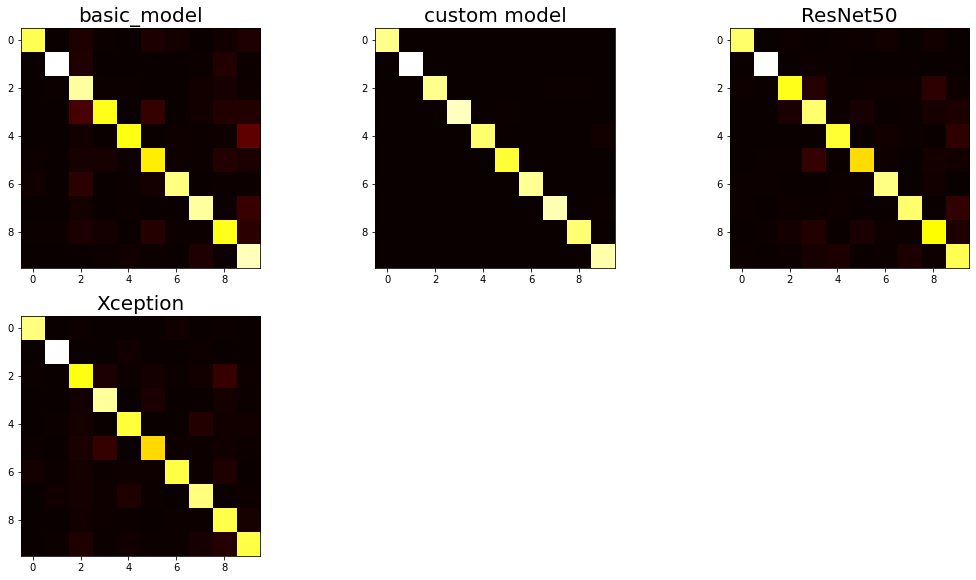

In [31]:
con_mat = list()
plt.figure(figsize=(18,15))
for i in range(len(models)):
    con_mat.append(confusion_matrix(y_test, pred_list[i]))
    
    plt.subplot(3, 3, i+1)
    plt.imshow(con_mat[i], cmap='hot', interpolation='nearest')
    plt.title(df.iloc[i][0], fontsize = 20)
plt.show

In [32]:
df

,Model,Accuracy,Precision,Recall,F1 Score,Jaccard Score,Hamming Loss
0,basic_model,0.866619,0.877780,0.866619,0.868163,0.770234,0.133381
1,custom model,0.986000,0.986033,0.986000,0.986004,0.972422,0.014000
2,ResNet50,0.899524,0.901269,0.899524,0.899821,0.821072,0.100476
3,Xception,0.901857,0.903480,0.901857,0.901924,0.823662,0.098143
4,VGG19,0.949857,0.950740,0.949857,0.949943,0.905374,0.050143
5,DenseNet169,0.961571,0.962654,0.961571,0.961525,0.926342,0.038429
